In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
bautismos_path = "../data/clean/bautismos_clean.csv"
entierros_path = "../data/clean/entierros_clean.csv"
matrimonios_path = "../data/clean/matrimonios_clean.csv"

bautismos = pd.read_csv(bautismos_path)
entierros = pd.read_csv(entierros_path)
matrimonios = pd.read_csv(matrimonios_path)

In [3]:
os.makedirs("../figures", exist_ok=True)

In [4]:
def prepare_events(df, sacrament_label):
    df = df.copy()
    df["event_date"] = pd.to_datetime(df["event_date"], errors="coerce")
    df = df.dropna(subset=["event_date"])
    df["year"] = df["event_date"].dt.year
    df["sacrament"] = sacrament_label
    return df[["year", "sacrament"]]

bautismos_yearly = prepare_events(bautismos, "Baptisms")
entierros_yearly = prepare_events(entierros, "Burials")
matrimonios_yearly = prepare_events(matrimonios, "Marriages")

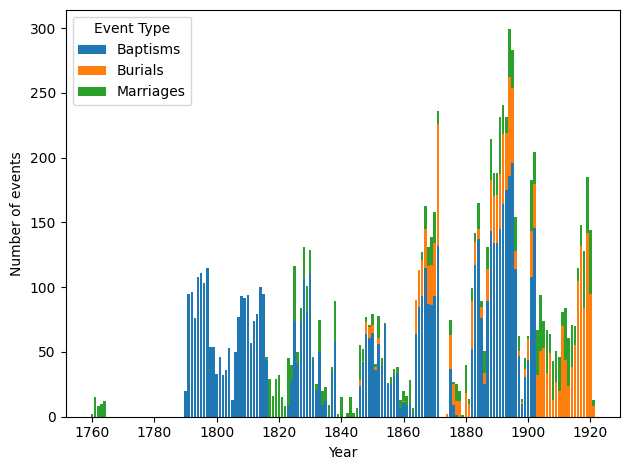

In [5]:
events_all = pd.concat(
    [bautismos_yearly, entierros_yearly, matrimonios_yearly],
    ignore_index=True
)

yearly_counts = (
    events_all
    .groupby(["year", "sacrament"])
    .size()
    .reset_index(name="count")
)

yearly_pivot = yearly_counts.pivot(index="year", columns="sacrament", values="count")

yearly_pivot = yearly_pivot.fillna(0).sort_index()


years = yearly_pivot.index.values
cols  = yearly_pivot.columns

fig, ax = plt.subplots()

bottom = np.zeros(len(years))  

for sacrament in cols:
    counts = yearly_pivot[sacrament].values
    ax.bar(
        years,
        counts,
        bottom=bottom,
        label=sacrament
    )
    bottom += counts  

ax.set_xlabel("Year")
ax.set_ylabel("Number of events")
ax.legend(title="Event Type")

plt.tight_layout()
plt.show()

fig.savefig("../figures/distribution_events_per_year.png", dpi=300)